In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('stock_data_july_2025.csv')

In [3]:
df.head()

,Date,Ticker,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low,Sector
0,6/1/2025,AAPL,185.96,187.79,188.85,183.74,42257183,2.931356e+12,28.37,0.49,6.62,248.20,155.68,Technology
1,6/1/2025,ABBV,189.63,193.64,194.31,188.03,33074970,3.289227e+11,16.74,3.51,11.57,210.83,127.91,Healthcare
2,6/1/2025,ABT,118.79,120.08,120.53,118.01,17130934,2.001333e+11,19.39,1.84,6.19,140.79,99.26,Healthcare
3,6/1/2025,ADBE,584.51,567.78,587.97,561.25,11080360,2.460380e+11,43.29,0.00,13.12,727.11,407.82,Technology
4,6/1/2025,ADP,253.46,255.60,258.59,249.91,10319559,1.052471e+11,29.92,2.04,8.54,303.75,234.28,Financials


In [4]:
df.isnull().sum()

Date              0
Ticker            0
Open Price        0
Close Price       0
High Price        0
Low Price         0
Volume Traded     0
Market Cap        0
PE Ratio          0
Dividend Yield    0
EPS               0
52 Week High      0
52 Week Low       0
Sector            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4346 non-null   object 
 1   Ticker          4346 non-null   object 
 2   Open Price      4346 non-null   float64
 3   Close Price     4346 non-null   float64
 4   High Price      4346 non-null   float64
 5   Low Price       4346 non-null   float64
 6   Volume Traded   4346 non-null   int64  
 7   Market Cap      4346 non-null   float64
 8   PE Ratio        4346 non-null   float64
 9   Dividend Yield  4346 non-null   float64
 10  EPS             4346 non-null   float64
 11  52 Week High    4346 non-null   float64
 12  52 Week Low     4346 non-null   float64
 13  Sector          4346 non-null   object 
dtypes: float64(10), int64(1), object(3)
memory usage: 475.5+ KB


In [6]:
df.describe()

,Open Price,Close Price,High Price,Low Price,Volume Traded,Market Cap,PE Ratio,Dividend Yield,EPS,52 Week High,52 Week Low
count,4346.000000,4346.000000,4346.000000,4346.000000,4.346000e+03,4.346000e+03,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000
mean,337.837002,337.907635,343.086233,332.737186,1.658002e+07,4.027126e+11,25.581173,1.807835,13.693049,410.097975,266.144823
std,472.650926,472.769476,479.915872,465.653353,1.522197e+07,6.202114e+11,12.923249,1.557671,20.268110,575.709969,377.470429
min,19.040000,18.990000,19.410000,18.900000,2.003906e+06,6.469973e+10,6.850000,0.000000,1.560000,21.130000,13.670000
25%,110.797500,110.527500,112.187500,109.292500,7.491280e+06,1.313524e+11,16.820000,0.470000,5.140000,130.547500,83.862500
50%,196.925000,195.915000,199.960000,193.745000,1.187239e+07,1.738019e+11,22.900000,1.800000,8.470000,235.125000,152.095000
75%,448.885000,451.100000,457.435000,443.027500,2.087384e+07,3.714750e+11,30.307500,2.767500,14.265000,531.735000,338.062500
max,3848.170000,3894.270000,3923.200000,3810.020000,8.996302e+07,3.589151e+12,97.700000,7.760000,197.370000,5069.750000,3529.240000


In [8]:
df.shape

(4346, 14)

In [9]:
df.duplicated().sum()   

0

In [10]:
df.columns

Index(['Date', 'Ticker', 'Open Price', 'Close Price', 'High Price',
       'Low Price', 'Volume Traded', 'Market Cap', 'PE Ratio',
       'Dividend Yield', 'EPS', '52 Week High', '52 Week Low', 'Sector'],
      dtype='object')

In [12]:
sector_summary = df.groupby("Sector")["Market Cap"].sum().sort_values(ascending=False)
print("\n--- Market Cap by Sector ---")
print(sector_summary)


--- Market Cap by Sector ---
Sector
Technology                6.532741e+14
Communication Services    2.271287e+14
Healthcare                2.240396e+14
Financials                2.161377e+14
Consumer Discretionary    1.902204e+14
Consumer Staples          1.121521e+14
Industrials               5.698486e+13
Energy                    4.078777e+13
Utilities                 1.774581e+13
Real Estate               1.171822e+13
Name: Market Cap, dtype: float64


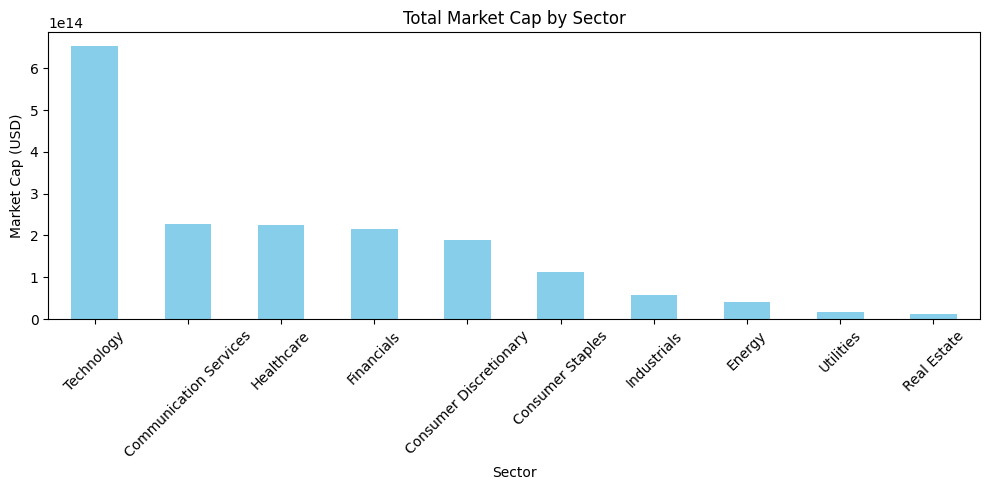

In [13]:

plt.figure(figsize=(10,5))
sector_summary.plot(kind='bar', color='skyblue')
plt.title("Total Market Cap by Sector")
plt.ylabel("Market Cap (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_20704\1472325910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sector', order=df['Sector'].value_counts().index, palette='viridis')


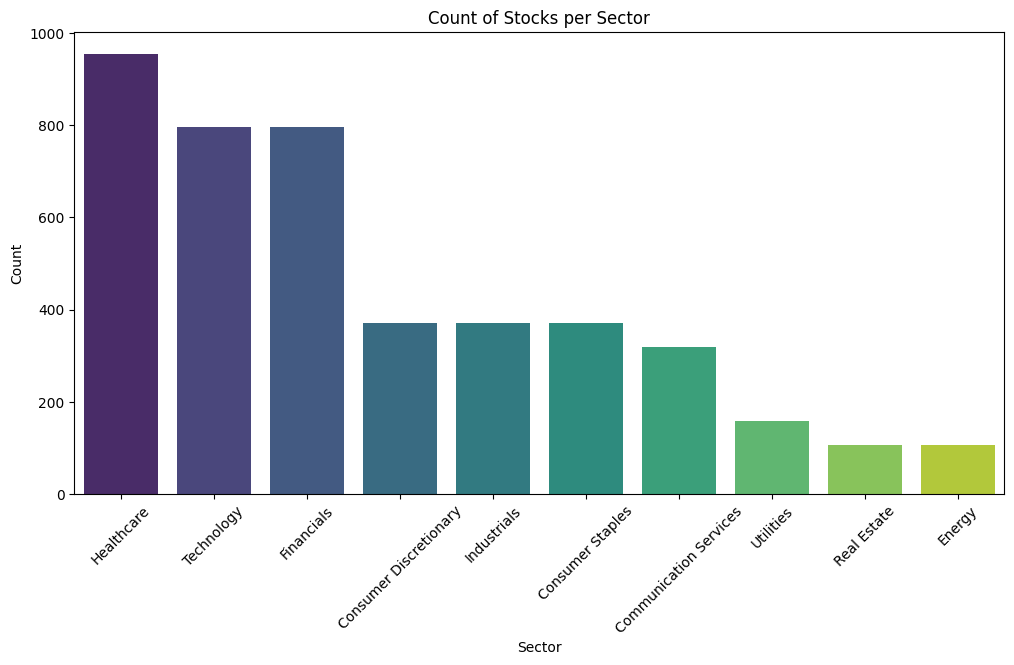

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sector', order=df['Sector'].value_counts().index, palette='viridis')
plt.title('Count of Stocks per Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

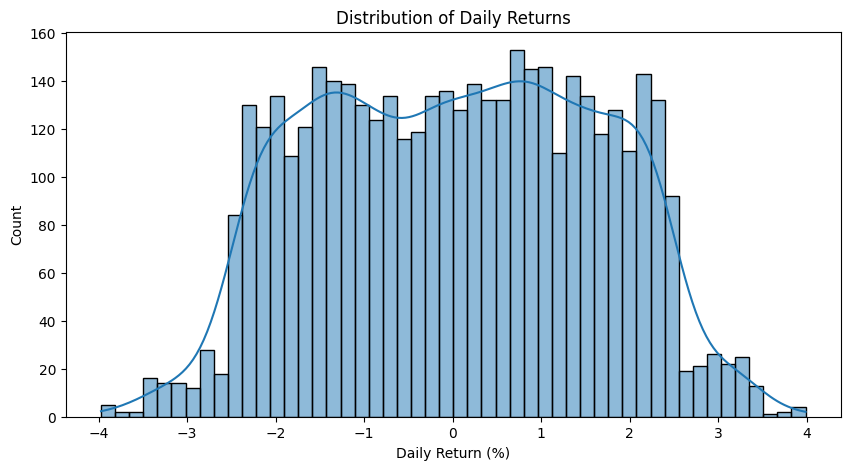

In [15]:
df['Daily Return (%)'] = (df['Close Price'] - df['Open Price']) / df['Open Price'] * 100

plt.figure(figsize=(10,5))
sns.histplot(df['Daily Return (%)'], bins=50, kde=True)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return (%)")
plt.show()



--- Top 5 Stocks by Avg Volume ---
Ticker
GOOGL    6.329104e+07
META     6.125019e+07
AAPL     6.091015e+07
MSFT     5.671241e+07
AMZN     5.665857e+07
Name: Volume Traded, dtype: float64


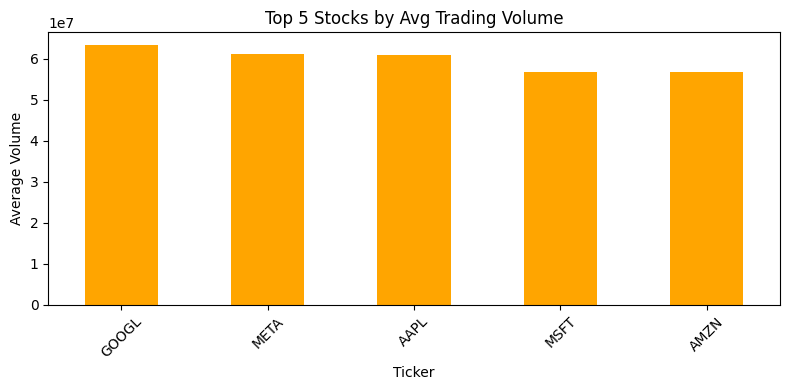

In [18]:
top_volume = df.groupby("Ticker")["Volume Traded"].mean().sort_values(ascending=False).head(5)
print("\n--- Top 5 Stocks by Avg Volume ---")
print(top_volume)

plt.figure(figsize=(8,4))
top_volume.plot(kind='bar', color='orange')
plt.title("Top 5 Stocks by Avg Trading Volume")
plt.ylabel("Average Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

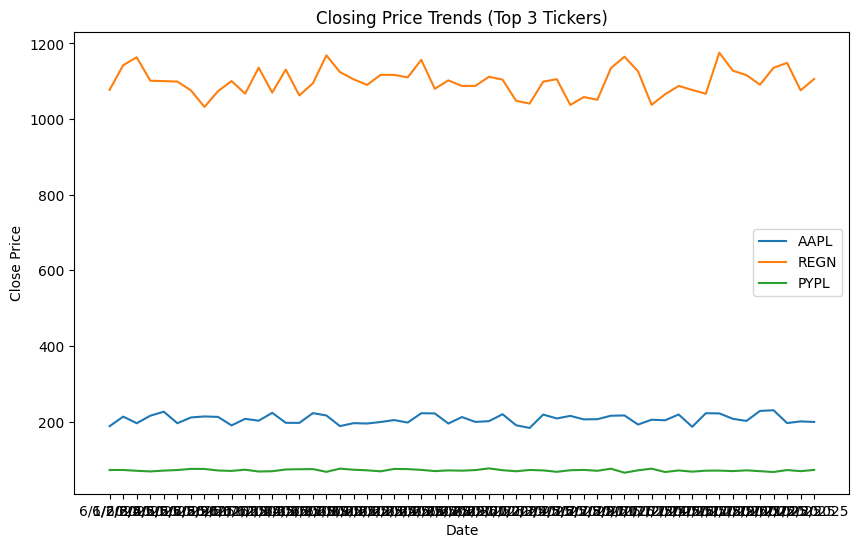

In [19]:
top3_tickers = df['Ticker'].value_counts().head(3).index
plt.figure(figsize=(10,6))
for ticker in top3_tickers:
    ticker_data = df[df['Ticker'] == ticker]
    plt.plot(ticker_data['Date'], ticker_data['Close Price'], label=ticker)
plt.title("Closing Price Trends (Top 3 Tickers)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

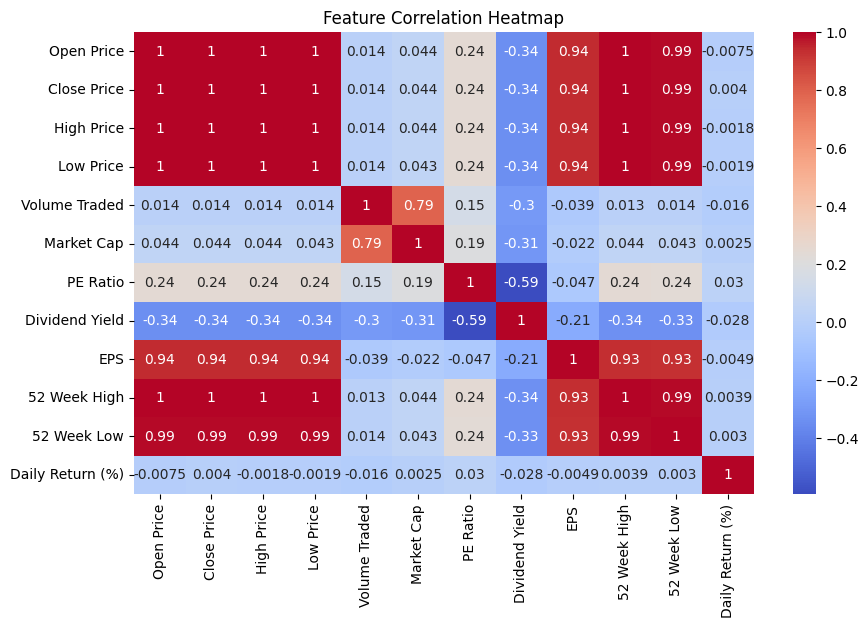

In [20]:
plt.figure(figsize=(10,6))
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
